In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.chdir('..')
import rwpropa as rw

In [ ]:
kappa = 1.1*10**21
energy = 3*10**16
step_sizes = np.logspace(9, 13, 12)[::-1]
traj_max = 10**16

# test sim:
sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, step_size = 10**10, nr_steps = 10, diffusion_coefficient_para = kappa, nr_obs_steps = 1)
    

for step_size in step_sizes[:8]:
    print('______________________________________________________________')
    nr_steps = int(traj_max/step_size)
    sim = rw.IsotropicSimulation(nr_particles = 10**3, energy = energy, step_size = step_size, nr_steps = nr_steps, diffusion_coefficient_para = kappa, nr_obs_steps = 100)
    file_name = 'comparison/data/raw_data/rwpropa_'+str(step_size/10**11)
    %time sim.simulate(file_name)
    df = pd.read_pickle(file_name+'.pkl')
    sta = rw.Statistics(df)
    df_kappas = sta.get_diffusion_coefficients()
    plt.plot(df_kappas['l'], (df_kappas['kappa']))
    file_name = 'comparison/data/sim_result_rwp_'
    np.save(file_name+str(step_size/10**11)+'_l.npy', np.array(df_kappas['l']))
    np.save(file_name+str(step_size/10**11)+'_kappa.npy', np.array(df_kappas['kappa']))

plt.loglog()

______________________________________________________________
simulate with a diffusion coefficient of  1.1000000000000001e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_100.0.pkl
CPU times: user 4.51 s, sys: 56 ms, total: 4.56 s
Wall time: 5.14 s
init statistics plotting class
______________________________________________________________
simulate with a diffusion coefficient of  1.1000000000000001e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_43.287612810830616.pkl
CPU times: user 9.05 s, sys: 75.9 ms, total: 9.13 s
Wall time: 12.2 s
init statistics plotting class
______________________________________________________________
simulate with a diffusion coefficient of  1.1000000000000001e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_18.738174228603867.pkl
CPU times: user

### CRPropa simulations
Run **python3 sim.py** in the folder *rwpropa_project/rwpropa/comparison* to generate all relevant CRPropa files for the comparison test. The parameters should be similar to the RWPropa simulations, such as max_traj, diffusion coefficients, step_sizes.

no data
no data
no data
no data


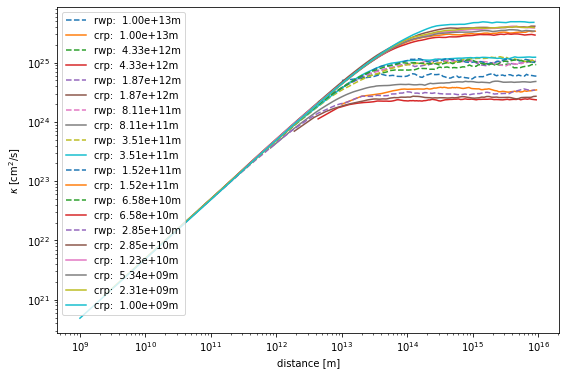

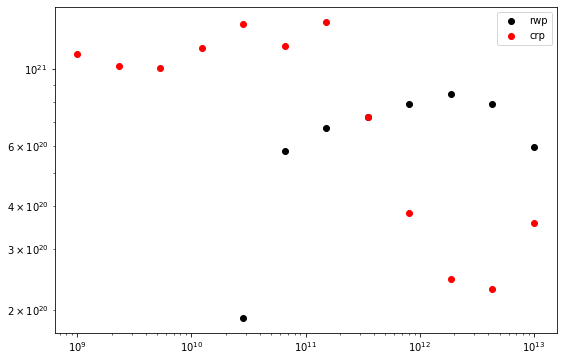

In [34]:
### load crpropa data
step_sizes = np.logspace(9, 13, 12)[::-1]

fig, ax1 = plt.subplots(figsize=(9,6))
kappas_crp = []
kappas_rwp = []
steps_crp = [] 
steps_rwp = []
for step_size in step_sizes:
    n_max = -1
    try:
        rwp_l = np.load('comparison/data/sim_result_rwp_'+str(step_size/10**11)+'_l.npy')
        rwp_kappa = np.load('comparison/data/sim_result_rwp_'+str(step_size/10**11)+'_kappa.npy')
        kappa = np.mean(rwp_kappa[:-10])
        kappas_rwp.append(kappa)
        steps_rwp.append(step_size)
        ax1.plot(rwp_l[:n_max], np.array(rwp_kappa[:n_max])*10**4, ls='--', label=str("rwp:  {:.2e}".format(step_size))+'m')
    except:
        print('no data')
    
    try:
        crp_l = np.load('comparison/data/sim_result_crp_'+str(step_size/10**11)+'_l.npy')
        crp_kappa = np.load('comparison/data/sim_result_crp_'+str(step_size/10**11)+'_kappa.npy')
        kappa = np.mean(crp_kappa[:-10])
        kappas_crp.append(kappa)
        steps_crp.append(step_size)
        ax1.plot(crp_l[:n_max], np.array(crp_kappa[:n_max])*10**4, ls='-', label=str("crp:  {:.2e}".format(step_size))+'m')
    except:
        print('no data')
        
ax1.set_xlabel('distance [m]')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

plt.legend()
plt.show()
fig, ax1 = plt.subplots(figsize=(9,6))
plt.scatter(steps_rwp, kappas_rwp, c='k', label='rwp')
plt.scatter(steps_crp, kappas_crp, c='r', label='crp')
ax1.loglog()
plt.legend()
plt.show()

[3.5737454535417266e+20, 2.2997782827226127e+20, 2.4572228677687122e+20, 3.8219573646659925e+20, 7.271176647052377e+20, 1.3731775037393926e+21, 1.1687060045539194e+21, 1.3553579064177173e+21, 1.1508084888144394e+21, 1.0104978114905942e+21, 1.0193699031328053e+21, 1.1090712272288996e+21]
[67.77713310198294, 79.26392619102755, 77.84431867456996, 65.5391171384416, 34.43904711855184, 23.813283585976972, 5.377001572209374, 22.206570068920104, 3.763262499363866, 8.887924717387063, 8.087967832347436, 0.0]


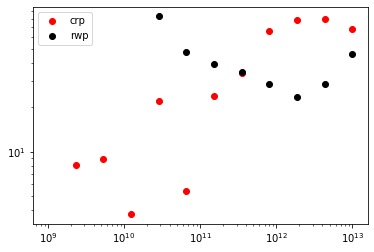

In [35]:
print(kappas_crp)
kappas_crp_err = []
kappas_rwp_err = []
kappa_ref = kappas_crp[-1] # kappa for smallest step size
for kappa in kappas_crp:
    kappa_err = np.abs(kappa - kappa_ref)/kappa_ref*100
    kappas_crp_err.append(kappa_err)
   
print(kappas_crp_err)
for kappa in kappas_rwp:
    kappa_err = np.abs(kappa - kappa_ref)/kappa_ref*100
    kappas_rwp_err.append(kappa_err)
    
plt.scatter(steps_crp, kappas_crp_err, c='r', label='crp')
plt.scatter(steps_rwp, kappas_rwp_err, c='k', label='rwp')
plt.loglog()
plt.legend()
plt.show()

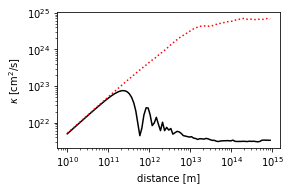

In [7]:
### load crpropa data
bB = 0.1
crp_d = np.load('sim_result_ana_d.npy')
crp_kappa_perp = np.load('sim_result_ana_kappa_perp.npy')
crp_kappa_para = np.load('sim_result_ana_kappa_para.npy')

fig, ax1 = plt.subplots(figsize=(4,2.5))

n_max = -1
ax1.plot(crp_d[:n_max], np.array(crp_kappa_perp[:n_max])*10**4, label='$\kappa_\perp$ (EOM)', color='k')
ax1.plot(crp_d[:n_max], np.array(crp_kappa_para[:n_max])*10**4, linestyle=':', label='$\kappa_\parallel$ (EOM)', color='r')


ax1.set_xlabel('distance [m]')
#ax1.axvline(x=mfp[1], c='grey', ls=':')
#ax1.axvline(x=mfp[2], c='grey', ls='--')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

#fig.legend()
#plt.savefig('kappas_bB_'+str(bB)+'.pdf')
plt.show()

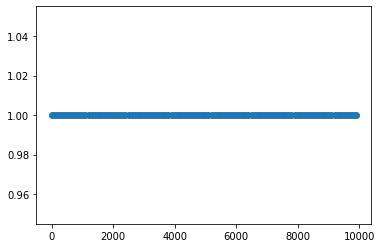

In [45]:
log_list = []
dist = 100
nr = 100
minimum = 1
for i in range(nr):
    value = minimum + i*dist
    log_list.append(value)
    
plt.scatter(log_list, np.ones(len(log_list)))

[]

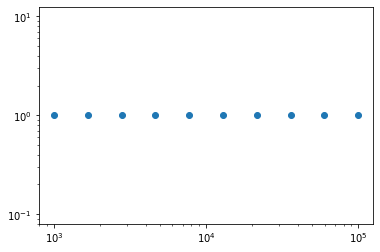

In [88]:
log_list = []
dist = 1000
nr = 10
start = 10**3
end = 10**5
for i in range(0,nr):
    f = start * np.power(end/start*1.0, i/(nr-1.0))
    log_list.append(f)
    
plt.scatter(log_list, np.ones(len(log_list)))
plt.loglog()

[]

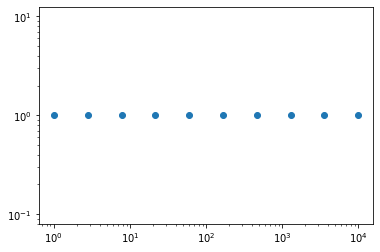

In [70]:
plt.scatter(np.logspace(0, 4, nr), np.ones(nr))
plt.loglog()